In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = glob(f'feature_importance*.xlsx')
df = pd.concat(pd.read_excel(excel_file) for excel_file in files)
df.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)

In [3]:
df

,feature,importance,stddev,p_value,n,p99_high,p99_low
0,eval-TLP-Stroop-color-PD,0.279788,0.034886,0.000028,5,0.351619,0.207958
1,demo-edad,0.057324,0.007457,0.000034,5,0.072678,0.041969
2,eval-TLP-CubCorsi-totalDirectos-PD,0.048177,0.008236,0.000099,5,0.065136,0.031218
3,eval-TLP-Stroop-palabras-PD,0.044606,0.006606,0.000056,5,0.058208,0.031005
4,eval-TLP-Tavec-10_RL_LP-PD,0.037475,0.016517,0.003557,5,0.071484,0.003465
...,...,...,...,...,...,...,...
14,clin-reservaCognitiva_escolaridad,0.000000,0.000000,0.500000,5,0.000000,0.000000
15,eval-TLP-FigRey-Duracion-PD,0.000000,0.000000,0.500000,5,0.000000,0.000000
16,eval-TLP-CubCorsi-total-PD,0.000000,0.000000,0.500000,5,0.000000,0.000000
17,demo-genero,0.000000,0.000000,0.500000,5,0.000000,0.000000


Importancia por característica

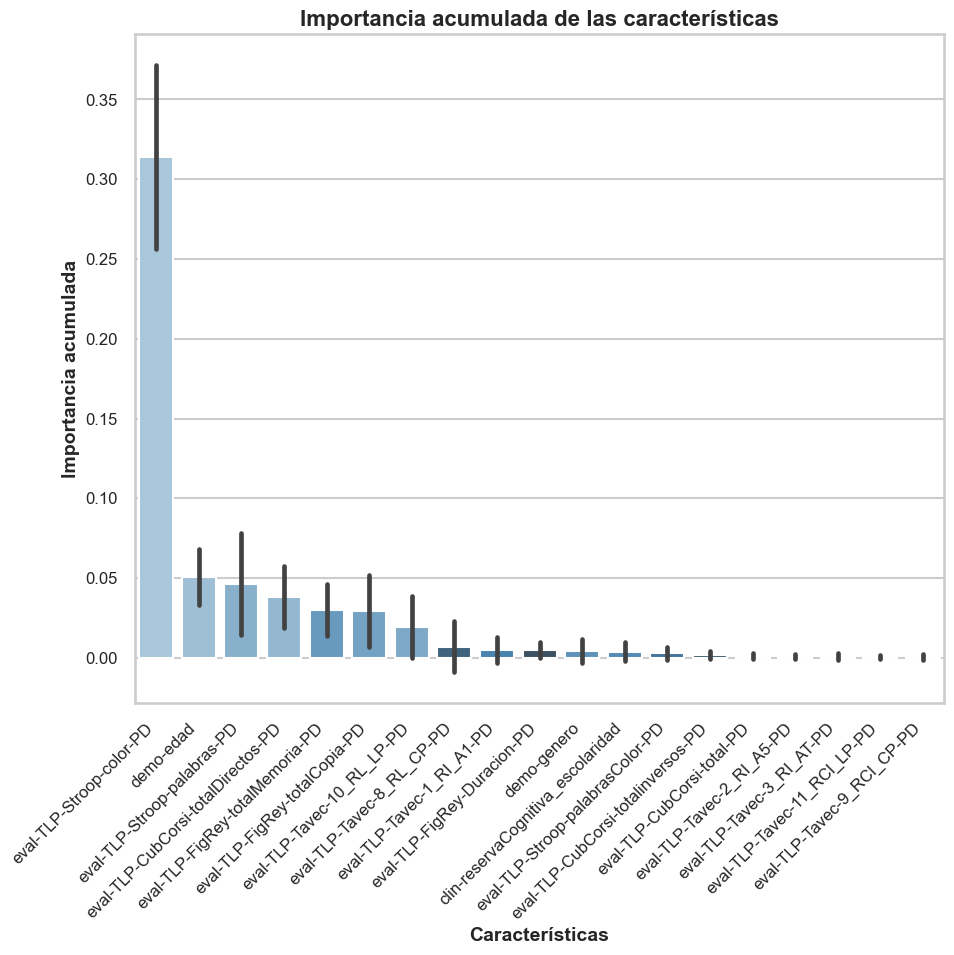

In [4]:
# Ordenar las features según la importancia (de mayor a menor)
order = df.groupby('feature', as_index=False)['importance'].sum().sort_values('importance', ascending=False)['feature']

# Estilo científico y profesional
sns.set(style="whitegrid", context="talk", font_scale=1.2)

plt.figure(figsize=(10, 10))

# Añadir hue y desactivar leyenda para evitar el warning
sns.barplot(
    data=df,
    x='feature',
    y='importance',
    hue='feature',         # Necesario para usar palette sin warning
    palette='Blues_d',
    order=order,
    legend=False,
    errorbar="sd"
)

# Etiquetas y título
plt.xlabel('Características', fontsize=14, weight='bold')
plt.ylabel('Importancia acumulada', fontsize=14, weight='bold')
plt.title('Importancia acumulada de las características', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')

# Ajustes estéticos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [5]:
feature_importance= df.groupby('feature')[['importance', 'stddev']].sum().sort_values('importance', ascending=False).reset_index()

In [6]:
feature_importance

,feature,importance,stddev
0,eval-TLP-Stroop-color-PD,3.140174,0.415745
1,demo-edad,0.507871,0.105723
2,eval-TLP-Stroop-palabras-PD,0.461934,0.101995
3,eval-TLP-CubCorsi-totalDirectos-PD,0.381116,0.105678
4,eval-TLP-FigRey-totalMemoria-PD,0.297856,0.099605
5,eval-TLP-FigRey-totalCopia-PD,0.294531,0.113268
6,eval-TLP-Tavec-10_RL_LP-PD,0.194232,0.064812
7,eval-TLP-Tavec-8_RL_CP-PD,0.070325,0.016689
8,eval-TLP-Tavec-1_RI_A1-PD,0.048359,0.022627
9,eval-TLP-FigRey-Duracion-PD,0.047861,0.017236


P-valor

In [8]:
feature_p_value = df[df['p_value'] < 0.05].groupby('feature')['feature'].count().sort_values(ascending=False).reset_index(name='count')

In [9]:
feature_p_value

,feature,count
0,eval-TLP-Stroop-color-PD,10
1,eval-TLP-Stroop-palabras-PD,10
2,eval-TLP-CubCorsi-totalDirectos-PD,10
3,demo-edad,10
4,eval-TLP-FigRey-totalMemoria-PD,9
5,eval-TLP-Tavec-10_RL_LP-PD,9
6,eval-TLP-FigRey-Duracion-PD,8
7,eval-TLP-FigRey-totalCopia-PD,8
8,clin-reservaCognitiva_escolaridad,5
9,eval-TLP-CubCorsi-totalinversos-PD,4


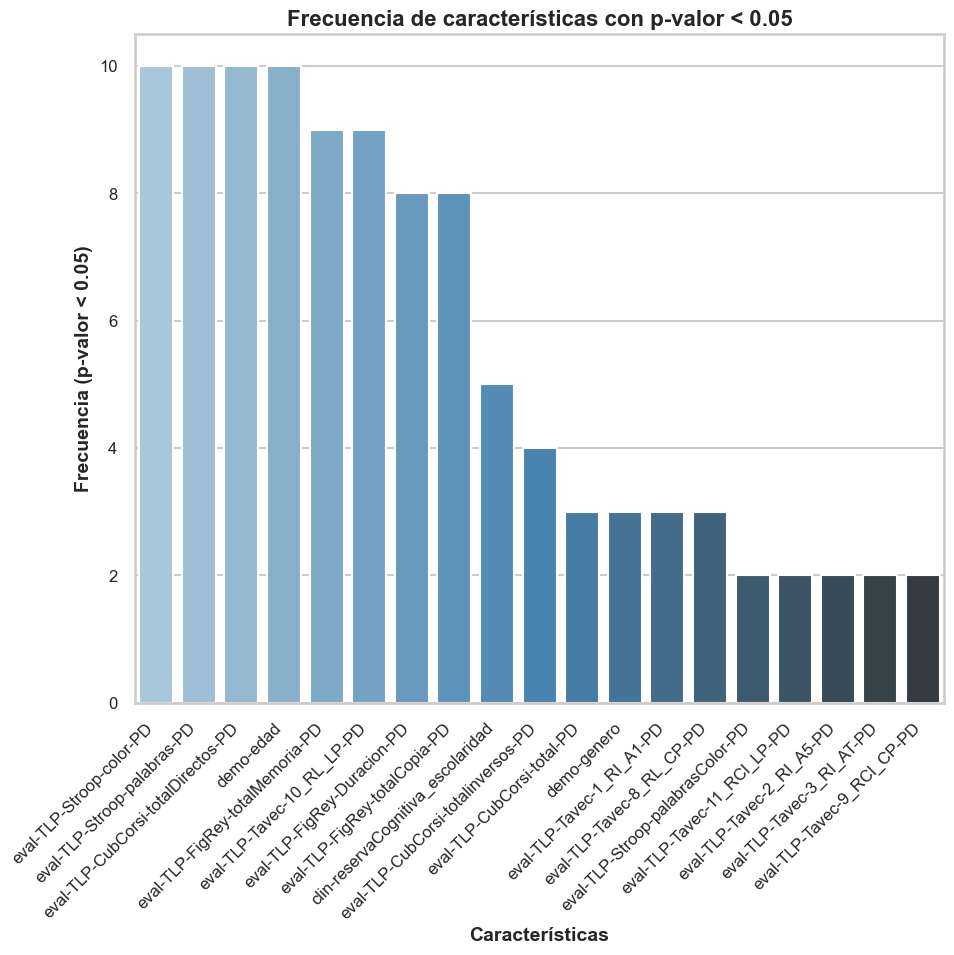

In [10]:
# Estilo científico y profesional
sns.set(style="whitegrid", context="talk", font_scale=1.2)

plt.figure(figsize=(10, 10))

# Añadir hue y desactivar leyenda para evitar el warning
sns.barplot(
    data=feature_p_value,
    x='feature',
    y='count',
    hue='feature',         # Necesario para usar palette sin warning
    palette='Blues_d',
    legend=False
)

# Etiquetas y título
plt.xlabel('Características', fontsize=14, weight='bold')
plt.ylabel('Frecuencia (p-valor < 0.05)', fontsize=14, weight='bold')
plt.title('Frecuencia de características con p-valor < 0.05', fontsize=16, weight='bold')

# Ajustes estéticos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
